# Clustering and Classification with Python

#### Student no : 21626843
#### Student name : Sadık Can Acar 



### Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

The purpose of this assignment is to be able to predict the types of beans in the most accurate way with machine learning methods by using the dataset created from various beans images. In this assignment, we will try to make our prediction in the most accurate way with clustering and classification methods.

## Data Understanding<a class="anchor" id="data_understanding"></a>

At the stage of understanding the data, I first read our data set.

In [2]:
OD = pd.read_csv('data.csv')

I examined the first 5 and the last 5 rows to get acquainted with the data set.

In [3]:
OD.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
OD.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In order to see how much data we have in our data set, the number of rows and columns, and the data types, I have performed the following operations.

In [5]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
OD.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

I have done the following procedure to see the properties such as the largest, smallest and average values of this data.

In [7]:
OD.describe(include='all')

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DERMASON
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3546
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,NaN
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,NaN
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,NaN
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,NaN
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,NaN
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,NaN


I came to some conclusions as a result of the above processes. There are no null values in the data set. All values are numeric, except for the Class column, which is our target column. We have 7 Class values. Outlier values stand out in features such as Area, Perimeter, ConvexArea.

## Data Preparation<a class="anchor" id="data_preparation"></a>

Below, it has been checked whether there is a null value in the data set.

In [8]:
OD.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

It has been checked whether there are duplicate rows in the data set.

In [9]:
duplicate_rows_OD = OD[OD.duplicated()]
print("Number of duplicate rows:", duplicate_rows_OD.shape)

Number of duplicate rows: (68, 17)


In [10]:
OD.count()

Area               13611
Perimeter          13611
MajorAxisLength    13611
MinorAxisLength    13611
AspectRation       13611
Eccentricity       13611
ConvexArea         13611
EquivDiameter      13611
Extent             13611
Solidity           13611
roundness          13611
Compactness        13611
ShapeFactor1       13611
ShapeFactor2       13611
ShapeFactor3       13611
ShapeFactor4       13611
Class              13611
dtype: int64

There are 13611 rows with duplicate rows. 68 rows were repeated. These rows have been deleted and 13543 rows remain.

In [11]:
OD.drop_duplicates(inplace=True)

In [12]:
OD.count()

Area               13543
Perimeter          13543
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         13543
EquivDiameter      13543
Extent             13543
Solidity           13543
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class              13543
dtype: int64

Since the values in our target column are objects, their values ​​have been converted to numeric values.

In [13]:
OD['Class'] = OD['Class'].replace(['SEKER','BARBUNYA','BOMBAY','CALI', 'DERMASON', 'HOROZ', 'SIRA'], 
                                  [0, 1, 2, 3, 4, 5, 6])

How many values from which class has been checked.

In [14]:
OD['Class'].value_counts()

4    3546
6    2636
0    2027
5    1860
3    1630
1    1322
2     522
Name: Class, dtype: int64

ExtraTreesClassifier was used to see which features are important.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier() 
model.fit( OD[ ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
             'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
             'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
             'ShapeFactor4'] ] , OD['Class'])

ExtraTreesClassifier()

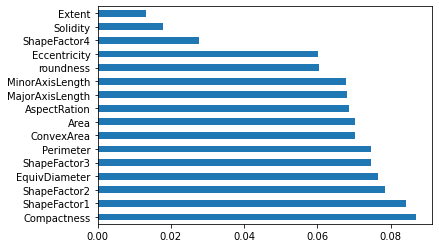

In [16]:
feature_importances = pd.Series(model.feature_importances_, index= OD[ ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
             'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
             'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
             'ShapeFactor4'] ].columns)
feature_importances.nlargest(16).plot(kind='barh')
plt.show()

Heatmap was used to see the correlation between our target column and features.

Text(0.5, 1.0, 'Correlation Heatmap')

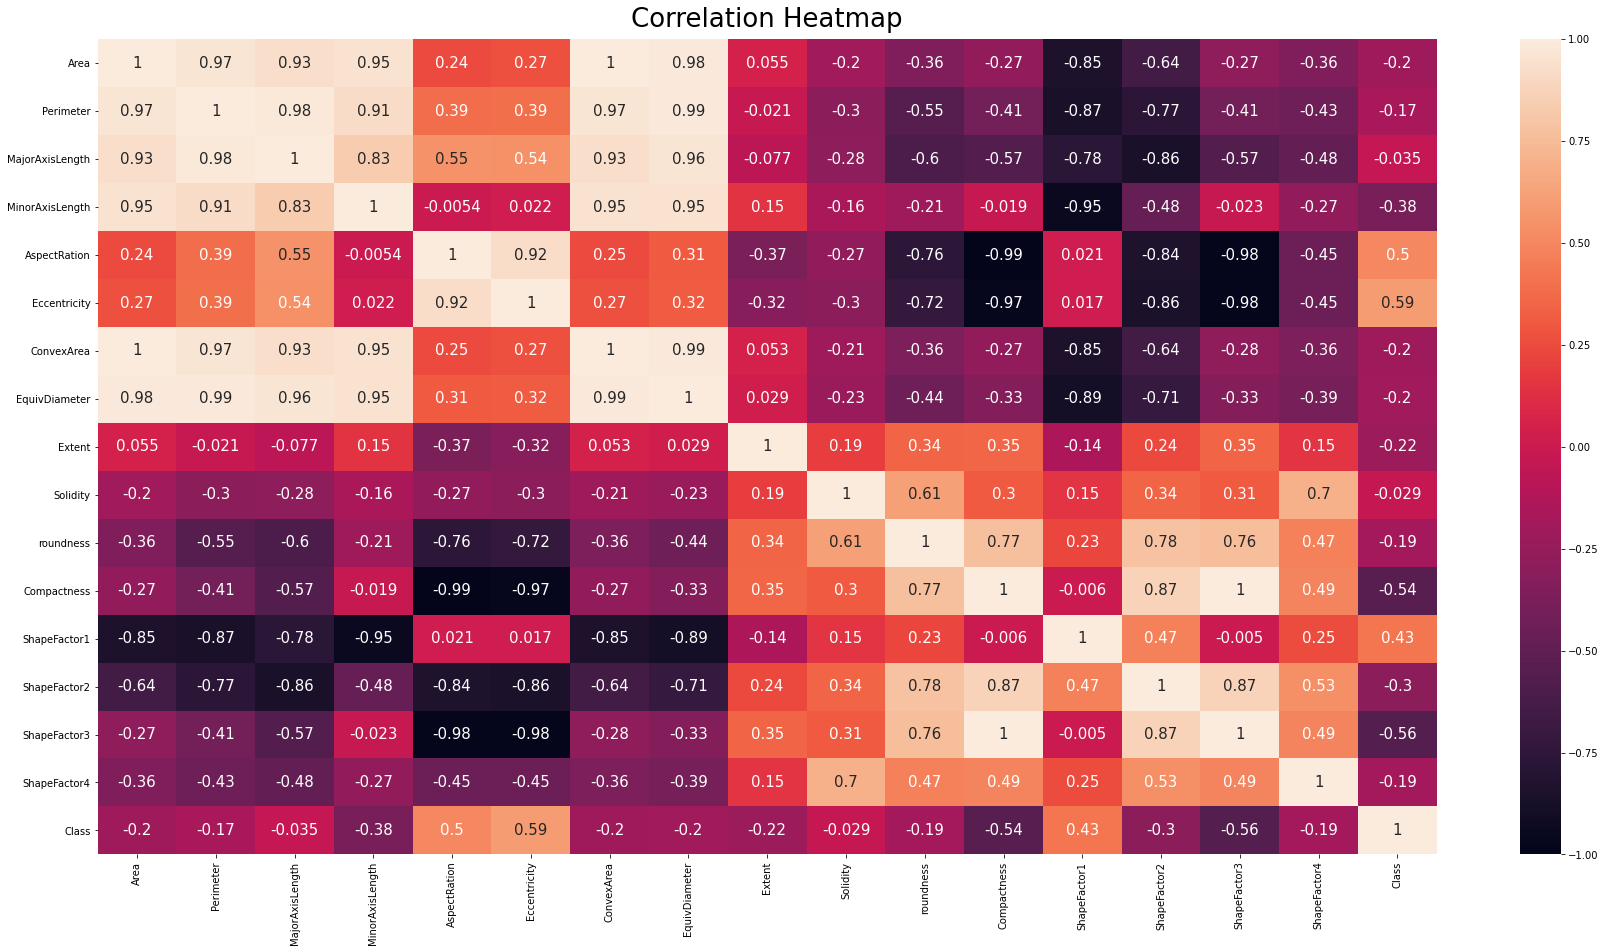

In [17]:
plt.figure(figsize=(30,15))
corr = OD.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, annot_kws={"size": 15})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':26}, pad = 12)

Text(0.5, 1.0, 'Features Correlating with Class')

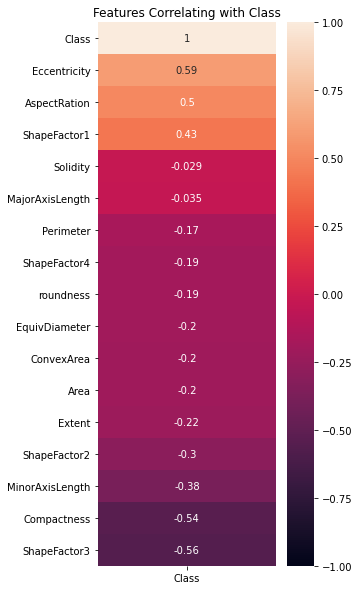

In [18]:
plt.figure(figsize=(4, 10))
heatmap = sns.heatmap(OD.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize': 12})

Unrelated columns are deleted according to Heatmap and Feature Importance results.

In [19]:
OD = OD.drop(columns = ['ShapeFactor3', 'MinorAxisLength', 'ShapeFactor2', 'Extent', 'Area', 'ConvexArea', 
                        'EquivDiameter', 'roundness', 'ShapeFactor4', 'MajorAxisLength', 'Solidity'])

In [20]:
OD.head()

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1,Class
0,610.291,1.197191,0.549812,0.913358,0.007332,0
1,638.018,1.097356,0.411785,0.953861,0.006979,0
2,624.110,1.209713,0.562727,0.908774,0.007244,0
3,645.884,1.153638,0.498616,0.928329,0.007017,0
4,620.134,1.060798,0.333680,0.970516,0.006697,0


Outlier was checked in the remaining columns after the columns were deleted. The outliers have been replaced with the mean values of those columns.

<AxesSubplot:xlabel='Perimeter'>

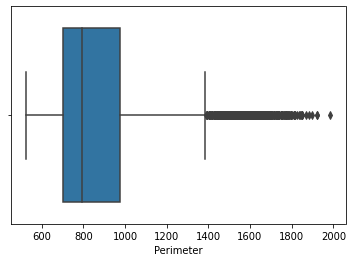

In [21]:
sns.boxplot(x=OD["Perimeter"])

In [22]:
mean_per = OD['Perimeter'].mean()
OD['Perimeter'].replace(OD['Perimeter'].max(), mean_per, inplace=True)

<AxesSubplot:xlabel='AspectRation'>

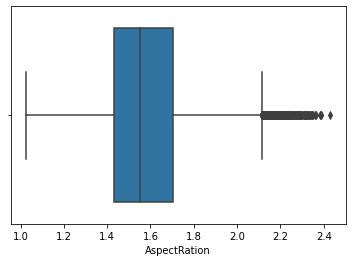

In [23]:
sns.boxplot(x=OD["AspectRation"])

In [24]:
mean_asp = OD['AspectRation'].mean()
OD['AspectRation'].replace(OD['AspectRation'].max(), mean_asp, inplace=True)

<AxesSubplot:xlabel='Eccentricity'>

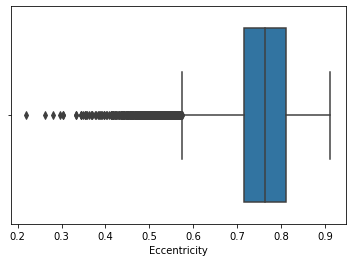

In [25]:
sns.boxplot(x=OD["Eccentricity"])

In [26]:
mean_ecc = OD['Eccentricity'].mean()
OD['Eccentricity'].replace(OD['Eccentricity'].max(), mean_ecc, inplace=True)

<AxesSubplot:xlabel='Compactness'>

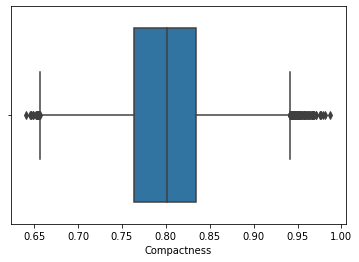

In [27]:
sns.boxplot(x=OD["Compactness"])

In [28]:
mean_com = OD['Compactness'].mean()
OD['Compactness'].replace(OD['Compactness'].max(), mean_com, inplace=True)

<AxesSubplot:xlabel='ShapeFactor1'>

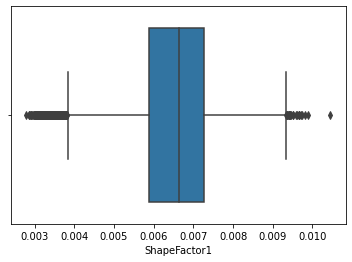

In [29]:
sns.boxplot(x=OD["ShapeFactor1"])

In [30]:
mean_sha = OD['ShapeFactor1'].mean()
OD['ShapeFactor1'].replace(OD['ShapeFactor1'].max(), mean_sha, inplace=True)

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

Libraries required for clustering have been added.

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

scaler = MinMaxScaler() # Creating MinMaxScaler for clustering

###### Normalizing and K-Means Clustering Original Data

In [32]:
clsND = scaler.fit_transform(OD) # Normalize original data

In [33]:
clsND = pd.DataFrame(clsND) # Convert normalized data to DataFrame
clsND

,0,1,2,3,4,5
0,0.061244,0.126337,0.480054,0.799864,0.639626,0.000000
1,0.081092,0.053144,0.279787,0.918629,0.590062,0.000000
2,0.071136,0.135516,0.498793,0.786424,0.627322,0.000000
3,0.086723,0.094406,0.405772,0.843763,0.595410,0.000000
4,0.068290,0.026342,0.166462,0.967465,0.550499,0.000000
...,...,...,...,...,...,...
13538,0.168195,0.386993,0.792278,0.472939,0.573181,0.666667
13539,0.166622,0.331063,0.749766,0.532719,0.549250,0.666667
13540,0.167927,0.328235,0.747390,0.534119,0.548281,0.666667
13541,0.171118,0.340511,0.757532,0.518659,0.554244,0.666667


In [34]:
clsND.columns = ['Perimeter','AspectRation','Eccentricity',
                 'Compactness', 'ShapeFactor1', 'Class'] # Changing column names
clsND

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1,Class
0,0.061244,0.126337,0.480054,0.799864,0.639626,0.000000
1,0.081092,0.053144,0.279787,0.918629,0.590062,0.000000
2,0.071136,0.135516,0.498793,0.786424,0.627322,0.000000
3,0.086723,0.094406,0.405772,0.843763,0.595410,0.000000
4,0.068290,0.026342,0.166462,0.967465,0.550499,0.000000
...,...,...,...,...,...,...
13538,0.168195,0.386993,0.792278,0.472939,0.573181,0.666667
13539,0.166622,0.331063,0.749766,0.532719,0.549250,0.666667
13540,0.167927,0.328235,0.747390,0.534119,0.548281,0.666667
13541,0.171118,0.340511,0.757532,0.518659,0.554244,0.666667


In [35]:
features_clsND = clsND.iloc[:, 0:5] # Selecting features from Normalized Data
features_clsND

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1
0,0.061244,0.126337,0.480054,0.799864,0.639626
1,0.081092,0.053144,0.279787,0.918629,0.590062
2,0.071136,0.135516,0.498793,0.786424,0.627322
3,0.086723,0.094406,0.405772,0.843763,0.595410
4,0.068290,0.026342,0.166462,0.967465,0.550499
...,...,...,...,...,...
13538,0.168195,0.386993,0.792278,0.472939,0.573181
13539,0.166622,0.331063,0.749766,0.532719,0.549250
13540,0.167927,0.328235,0.747390,0.534119,0.548281
13541,0.171118,0.340511,0.757532,0.518659,0.554244


Original data is normalized for clustering. Then, KMeans clustering was applied.

In [36]:
kmeans_ND = KMeans(n_clusters = 7).fit(features_clsND) # KMeans Clustering with Features of Normalized Data
y_pred_clsND = kmeans_ND.predict(features_clsND)

In [37]:
clsND['Cluster'] = y_pred_clsND  # Predicted column added to Normalized Data
clsND['Cluster'].value_counts()  # Checking value counts of clusters

4    3282
0    2858
2    2078
5    2041
3    1783
1     980
6     521
Name: Cluster, dtype: int64

In [38]:
clsND['Class'].value_counts() # Checking value counts of classes

0.666667    3546
1.000000    2636
0.000000    2027
0.833333    1860
0.500000    1630
0.166667    1322
0.333333     522
Name: Class, dtype: int64

In [39]:
clsND.head() # Checking Normalized Clustered Data

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1,Class,Cluster
0,0.061244,0.126337,0.480054,0.799864,0.639626,0.0,2
1,0.081092,0.053144,0.279787,0.918629,0.590062,0.0,2
2,0.071136,0.135516,0.498793,0.786424,0.627322,0.0,2
3,0.086723,0.094406,0.405772,0.843763,0.595410,0.0,2
4,0.068290,0.026342,0.166462,0.967465,0.550499,0.0,2


In [40]:
clsND.tail() # Checking Normalized Clustered Data

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1,Class,Cluster
13538,0.168195,0.386993,0.792278,0.472939,0.573181,0.666667,4
13539,0.166622,0.331063,0.749766,0.532719,0.549250,0.666667,4
13540,0.167927,0.328235,0.747390,0.534119,0.548281,0.666667,4
13541,0.171118,0.340511,0.757532,0.518659,0.554244,0.666667,4
13542,0.177173,0.436196,0.823750,0.423478,0.593159,0.666667,4


###### K-Means Clustering Original Data

KMeans clustering was applied to Original Data.

In [41]:
features_OD = OD.iloc[:, 0:5]  # Selecting features from Original Data
features_OD

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1
0,610.291,1.197191,0.549812,0.913358,0.007332
1,638.018,1.097356,0.411785,0.953861,0.006979
2,624.110,1.209713,0.562727,0.908774,0.007244
3,645.884,1.153638,0.498616,0.928329,0.007017
4,620.134,1.060798,0.333680,0.970516,0.006697
...,...,...,...,...,...
13606,759.696,1.552728,0.765002,0.801865,0.006858
13607,757.499,1.476439,0.735702,0.822252,0.006688
13608,759.321,1.472582,0.734065,0.822730,0.006681
13609,763.779,1.489326,0.741055,0.817457,0.006724


In [42]:
kmeans_OD = KMeans(n_clusters = 7).fit(features_OD)   # KMeans Clustering with Features of Original Data
y_pred = kmeans_OD.predict(features_OD)

In [43]:
OD['Cluster'] = y_pred  # Predicted column added to Original Data
OD['Cluster'].value_counts()  # Checking value counts of clusters

6    3464
3    2653
0    2327
1    1916
5    1767
4     905
2     511
Name: Cluster, dtype: int64

In [44]:
OD['Class'].value_counts()  # Checking value counts of classes

4    3546
6    2636
0    2027
5    1860
3    1630
1    1322
2     522
Name: Class, dtype: int64

In [45]:
OD.head() # Checking Original Clustered Data

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1,Class,Cluster
0,610.291,1.197191,0.549812,0.913358,0.007332,0,0
1,638.018,1.097356,0.411785,0.953861,0.006979,0,0
2,624.110,1.209713,0.562727,0.908774,0.007244,0,0
3,645.884,1.153638,0.498616,0.928329,0.007017,0,0
4,620.134,1.060798,0.333680,0.970516,0.006697,0,0


In [46]:
OD.tail() # Checking Original Clustered Data

,Perimeter,AspectRation,Eccentricity,Compactness,ShapeFactor1,Class,Cluster
13606,759.696,1.552728,0.765002,0.801865,0.006858,4,6
13607,757.499,1.476439,0.735702,0.822252,0.006688,4,6
13608,759.321,1.472582,0.734065,0.822730,0.006681,4,6
13609,763.779,1.489326,0.741055,0.817457,0.006724,4,6
13610,772.237,1.619841,0.786693,0.784997,0.007001,4,3


## Clustering results<a class="anchor" id="clustering"></a>

###### Normalized Data Clustering Results

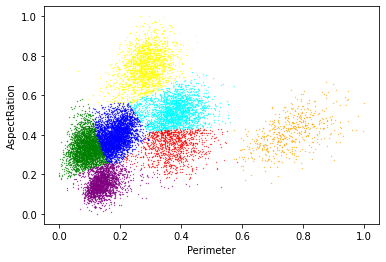

In [47]:
NDcl1 = clsND[clsND.Cluster==0]
NDcl2 = clsND[clsND.Cluster==1]
NDcl3 = clsND[clsND.Cluster==2]
NDcl4 = clsND[clsND.Cluster==3]
NDcl5 = clsND[clsND.Cluster==4]
NDcl6 = clsND[clsND.Cluster==5]
NDcl7 = clsND[clsND.Cluster==6]

plt.scatter(NDcl1.Perimeter, NDcl1.AspectRation, color='green', s=0.1)
plt.scatter(NDcl2.Perimeter, NDcl2.AspectRation, color='red', s=0.1)
plt.scatter(NDcl3.Perimeter, NDcl3.AspectRation, color='purple', s=0.1)
plt.scatter(NDcl4.Perimeter, NDcl4.AspectRation, color='yellow', s=0.1)
plt.scatter(NDcl5.Perimeter, NDcl5.AspectRation, color='blue', s=0.1)
plt.scatter(NDcl6.Perimeter, NDcl6.AspectRation, color='cyan', s=0.1)
plt.scatter(NDcl7.Perimeter, NDcl7.AspectRation, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('AspectRation')
plt.show()

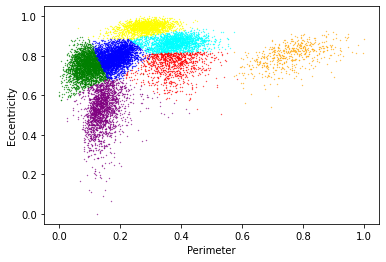

In [48]:
plt.scatter(NDcl1.Perimeter, NDcl1.Eccentricity, color='green', s=0.1)
plt.scatter(NDcl2.Perimeter, NDcl2.Eccentricity, color='red', s=0.1)
plt.scatter(NDcl3.Perimeter, NDcl3.Eccentricity, color='purple', s=0.1)
plt.scatter(NDcl4.Perimeter, NDcl4.Eccentricity, color='yellow', s=0.1)
plt.scatter(NDcl5.Perimeter, NDcl5.Eccentricity, color='blue', s=0.1)
plt.scatter(NDcl6.Perimeter, NDcl6.Eccentricity, color='cyan', s=0.1)
plt.scatter(NDcl7.Perimeter, NDcl7.Eccentricity, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.show()

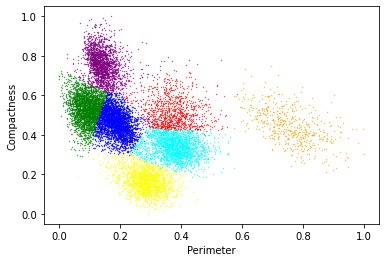

In [49]:
plt.scatter(NDcl1.Perimeter, NDcl1.Compactness, color='green', s=0.1)
plt.scatter(NDcl2.Perimeter, NDcl2.Compactness, color='red', s=0.1)
plt.scatter(NDcl3.Perimeter, NDcl3.Compactness, color='purple', s=0.1)
plt.scatter(NDcl4.Perimeter, NDcl4.Compactness, color='yellow', s=0.1)
plt.scatter(NDcl5.Perimeter, NDcl5.Compactness, color='blue', s=0.1)
plt.scatter(NDcl6.Perimeter, NDcl6.Compactness, color='cyan', s=0.1)
plt.scatter(NDcl7.Perimeter, NDcl7.Compactness, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Compactness')
plt.show()

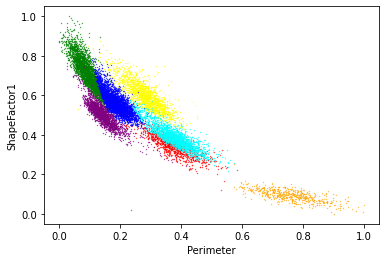

In [50]:
plt.scatter(NDcl1.Perimeter, NDcl1.ShapeFactor1, color='green', s=0.1)
plt.scatter(NDcl2.Perimeter, NDcl2.ShapeFactor1, color='red', s=0.1)
plt.scatter(NDcl3.Perimeter, NDcl3.ShapeFactor1, color='purple', s=0.1)
plt.scatter(NDcl4.Perimeter, NDcl4.ShapeFactor1, color='yellow', s=0.1)
plt.scatter(NDcl5.Perimeter, NDcl5.ShapeFactor1, color='blue', s=0.1)
plt.scatter(NDcl6.Perimeter, NDcl6.ShapeFactor1, color='cyan', s=0.1)
plt.scatter(NDcl7.Perimeter, NDcl7.ShapeFactor1, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('ShapeFactor1')
plt.show() 

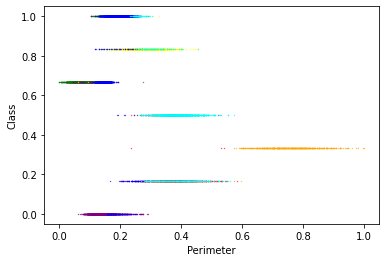

In [51]:
plt.scatter(NDcl1.Perimeter, NDcl1.Class, color='green', s=0.1)
plt.scatter(NDcl2.Perimeter, NDcl2.Class, color='red', s=0.1)
plt.scatter(NDcl3.Perimeter, NDcl3.Class, color='purple', s=0.1)
plt.scatter(NDcl4.Perimeter, NDcl4.Class, color='yellow', s=0.1)
plt.scatter(NDcl5.Perimeter, NDcl5.Class, color='blue', s=0.1)
plt.scatter(NDcl6.Perimeter, NDcl6.Class, color='cyan', s=0.1)
plt.scatter(NDcl7.Perimeter, NDcl7.Class, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Class')
plt.show()

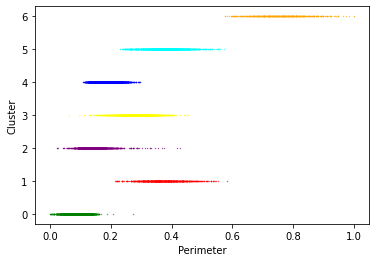

In [52]:
plt.scatter(NDcl1.Perimeter, NDcl1.Cluster, color='green', s=0.1)
plt.scatter(NDcl2.Perimeter, NDcl2.Cluster, color='red', s=0.1)
plt.scatter(NDcl3.Perimeter, NDcl3.Cluster, color='purple', s=0.1)
plt.scatter(NDcl4.Perimeter, NDcl4.Cluster, color='yellow', s=0.1)
plt.scatter(NDcl5.Perimeter, NDcl5.Cluster, color='blue', s=0.1)
plt.scatter(NDcl6.Perimeter, NDcl6.Cluster, color='cyan', s=0.1)
plt.scatter(NDcl7.Perimeter, NDcl7.Cluster, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Cluster')
plt.show()

In [53]:
print('Accuracy score for normalized clustered data: ', metrics.rand_score(clsND.Class, clsND.Cluster))
print('Silhouette score for normalized clustered data: ', metrics.silhouette_score(features_clsND, y_pred_clsND))

c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Accuracy score for normalized clustered data:  0.9088525340439402
Silhouette score for normalized clustered data:  0.43487064555554167


###### Original Data Clustering Results

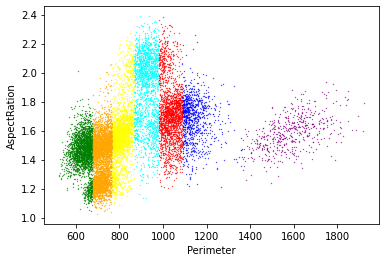

In [54]:
cl1 = OD[OD.Cluster==0]
cl2 = OD[OD.Cluster==1]
cl3 = OD[OD.Cluster==2]
cl4 = OD[OD.Cluster==3]
cl5 = OD[OD.Cluster==4]
cl6 = OD[OD.Cluster==5]
cl7 = OD[OD.Cluster==6]

plt.scatter(cl1.Perimeter, cl1.AspectRation, color='green', s=0.1)
plt.scatter(cl2.Perimeter, cl2.AspectRation, color='red', s=0.1)
plt.scatter(cl3.Perimeter, cl3.AspectRation, color='purple', s=0.1)
plt.scatter(cl4.Perimeter, cl4.AspectRation, color='yellow', s=0.1)
plt.scatter(cl5.Perimeter, cl5.AspectRation, color='blue', s=0.1)
plt.scatter(cl6.Perimeter, cl6.AspectRation, color='cyan', s=0.1)
plt.scatter(cl7.Perimeter, cl7.AspectRation, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('AspectRation')
plt.show()

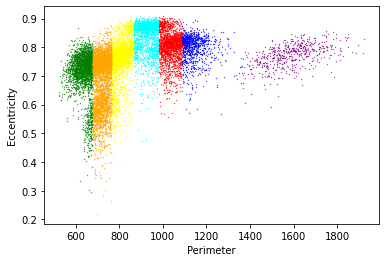

In [55]:
plt.scatter(cl1.Perimeter, cl1.Eccentricity, color='green', s=0.1)
plt.scatter(cl2.Perimeter, cl2.Eccentricity, color='red', s=0.1)
plt.scatter(cl3.Perimeter, cl3.Eccentricity, color='purple', s=0.1)
plt.scatter(cl4.Perimeter, cl4.Eccentricity, color='yellow', s=0.1)
plt.scatter(cl5.Perimeter, cl5.Eccentricity, color='blue', s=0.1)
plt.scatter(cl6.Perimeter, cl6.Eccentricity, color='cyan', s=0.1)
plt.scatter(cl7.Perimeter, cl7.Eccentricity, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.show()

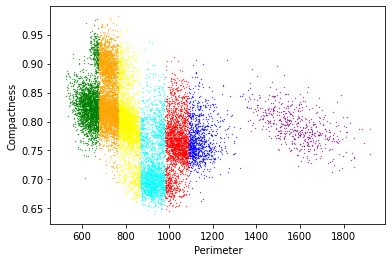

In [56]:
plt.scatter(cl1.Perimeter, cl1.Compactness, color='green', s=0.1)
plt.scatter(cl2.Perimeter, cl2.Compactness, color='red', s=0.1)
plt.scatter(cl3.Perimeter, cl3.Compactness, color='purple', s=0.1)
plt.scatter(cl4.Perimeter, cl4.Compactness, color='yellow', s=0.1)
plt.scatter(cl5.Perimeter, cl5.Compactness, color='blue', s=0.1)
plt.scatter(cl6.Perimeter, cl6.Compactness, color='cyan', s=0.1)
plt.scatter(cl7.Perimeter, cl7.Compactness, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Compactness')
plt.show()

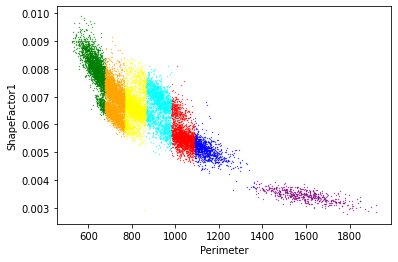

In [57]:
plt.scatter(cl1.Perimeter, cl1.ShapeFactor1, color='green', s=0.1)
plt.scatter(cl2.Perimeter, cl2.ShapeFactor1, color='red', s=0.1)
plt.scatter(cl3.Perimeter, cl3.ShapeFactor1, color='purple', s=0.1)
plt.scatter(cl4.Perimeter, cl4.ShapeFactor1, color='yellow', s=0.1)
plt.scatter(cl5.Perimeter, cl5.ShapeFactor1, color='blue', s=0.1)
plt.scatter(cl6.Perimeter, cl6.ShapeFactor1, color='cyan', s=0.1)
plt.scatter(cl7.Perimeter, cl7.ShapeFactor1, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('ShapeFactor1')
plt.show()

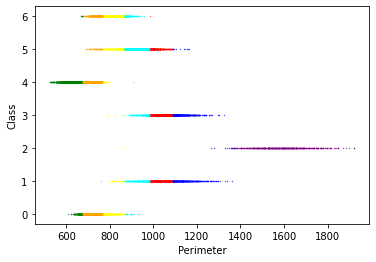

In [58]:
plt.scatter(cl1.Perimeter, cl1.Class, color='green', s=0.1)
plt.scatter(cl2.Perimeter, cl2.Class, color='red', s=0.1)
plt.scatter(cl3.Perimeter, cl3.Class, color='purple', s=0.1)
plt.scatter(cl4.Perimeter, cl4.Class, color='yellow', s=0.1)
plt.scatter(cl5.Perimeter, cl5.Class, color='blue', s=0.1)
plt.scatter(cl6.Perimeter, cl6.Class, color='cyan', s=0.1)
plt.scatter(cl7.Perimeter, cl7.Class, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Class')
plt.show()

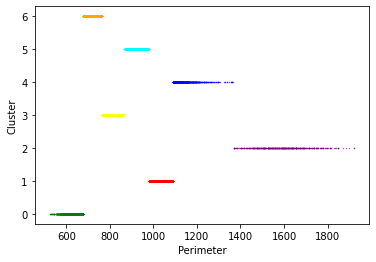

In [59]:
plt.scatter(cl1.Perimeter, cl1.Cluster, color='green', s=0.1)
plt.scatter(cl2.Perimeter, cl2.Cluster, color='red', s=0.1)
plt.scatter(cl3.Perimeter, cl3.Cluster, color='purple', s=0.1)
plt.scatter(cl4.Perimeter, cl4.Cluster, color='yellow', s=0.1)
plt.scatter(cl5.Perimeter, cl5.Cluster, color='blue', s=0.1)
plt.scatter(cl6.Perimeter, cl6.Cluster, color='cyan', s=0.1)
plt.scatter(cl7.Perimeter, cl7.Cluster, color='orange', s=0.1)

plt.xlabel('Perimeter')
plt.ylabel('Cluster')
plt.show()

In [60]:
print('Accuracy score for original clustered data: ', metrics.rand_score(OD.Class, OD.Cluster))
print('Silhouette score for original clustered data: ', metrics.silhouette_score(features_OD, y_pred))

Accuracy score for original clustered data:  0.8242532499005203
Silhouette score for original clustered data:  0.5368788636566485



## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

I chose Random Forest algorithm for classification. Because; Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

###### Separating Features and Target Column

In [61]:
X = OD.drop('Class', axis=1) # Feature's Columns
y = OD['Class']              # Target Column

###### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 40)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Creating MinMaxScaler

In [64]:
# Normalization
X_train_ND = scaler.fit_transform(X_train)
X_test_ND = scaler.fit_transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest for Normalized Data
rfc_ND = RandomForestClassifier()
rfc_ND.fit(X_train_ND, y_train)

RandomForestClassifier()

In [66]:
pred_rfc_ND = rfc_ND.predict(X_test_ND)

###### Evaluator for Classification

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print()
    
    print('Classification Report: \n',classification_report(y_test,y_pred))
    print()
    
    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')
    
    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)

In [68]:
# Random Forest for Original Data
rfc_OD = RandomForestClassifier()
rfc_OD.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
pred_rfc_OD = rfc_OD.predict(X_test)

## Evaluation<a class="anchor" id="evaluation"></a>

###### Evaluation of Classified Normalized Data

Accuracy is:  0.8904750184592666

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       584
           1       0.86      0.82      0.84       397
           2       1.00      0.99      1.00       146
           3       0.87      0.89      0.88       484
           4       0.92      0.87      0.89      1090
           5       0.91      0.96      0.93       558
           6       0.81      0.86      0.83       804

    accuracy                           0.89      4063
   macro avg       0.90      0.90      0.90      4063
weighted avg       0.89      0.89      0.89      4063


AUC_ROC Score:  0.9419607625619675 


Confusion Matrix: 




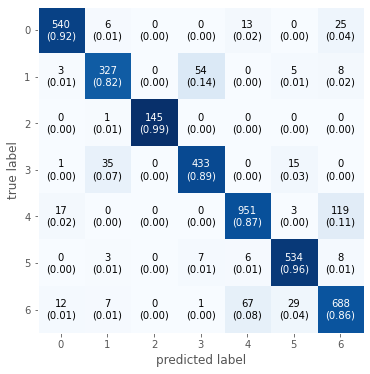

In [70]:
evaluator(y_test, pred_rfc_ND)

###### Evaluation of Classified Original Data

Accuracy is:  0.9059808023627861

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       584
           1       0.89      0.83      0.86       397
           2       1.00      0.99      1.00       146
           3       0.87      0.91      0.89       484
           4       0.91      0.92      0.92      1090
           5       0.96      0.93      0.95       558
           6       0.85      0.86      0.86       804

    accuracy                           0.91      4063
   macro avg       0.92      0.91      0.91      4063
weighted avg       0.91      0.91      0.91      4063


AUC_ROC Score:  0.947958322730166 


Confusion Matrix: 




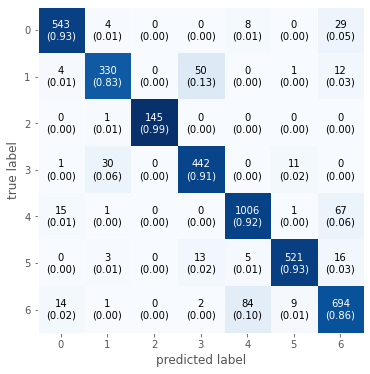

In [71]:
evaluator(y_test, pred_rfc_OD)

#### As a Conclusion:

##### As can be seen in the tables and graphs of the evaluation results, the estimates were quite high. My predictor reached 89% accuracy in normalized data and 91% accuracy in original data at classification phase. Also, my predictor reached 90% accuracy in normalized data and 82% accuracy in original data at clustering phase. 

##### As I mentioned at the beginning of this assignment, our aim was to predict the dried bean varieties with the Clustering and Classification models in the most accurate way.

## References<a class="anchor" id="references"></a>

1. https://www.kaggle.com/avibagul80/fetal-health-98accuracy/notebook
2. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
3. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
4. https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
5. https://datatofish.com/replace-values-pandas-dataframe/
6. https://www.kaggle.com/faressayah/k-means-clustering-private-vs-public-universities
7. https://scikit-learn.org/stable/modules/clustering.html
8. DataCamp
9. Lecture Notes


**Disclaimer!** <font color='grey'>This notebook was prepared by Sadık Can ACAR as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://www.linkedin.com/in/scanacar/).
</font>